<a href="https://colab.research.google.com/github/afifmazhar/Pneumonia_Classification/blob/main/COVID19_pneumonia_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from keras.preprocessing import image
import os 

In [ ]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 41.48 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
# listing the variables for the directories

orig_dir = '/content/datasets/Data'
test_dir = os.path.join(orig_dir,'test')
train_dir = os.path.join(orig_dir, 'train')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')

In [ ]:
# checking to see if the datasets contain the correct directories

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

['COVID-19 (457).jpg', 'COVID-19 (826).jpg', 'COVID19(84).jpg', 'COVID-19 (804).jpg', 'COVID19(439).jpg', 'COVID-19 (731).jpg', 'COVID19(552).jpg', 'COVID19(444).jpg', 'COVID19(425).jpg', 'COVID19(253).jpg']
['COVID-19 (34).jpg', 'COVID19(435).jpg', 'COVID19(519).jpg', 'COVID19(452).jpg', 'COVID19(451).jpg', 'COVID19(438).jpg', 'COVID-19 (5).jpeg', 'COVID-19 (180).jpg', 'COVID19(550).jpg', 'COVID-19 (4).jpg']
['NORMAL(355).jpg', 'NORMAL(737).jpg', 'NORMAL(332).jpg', 'NORMAL(618).jpg', 'NORMAL(248).jpg', 'NORMAL(911).jpg', 'NORMAL(490).jpg', 'NORMAL(1165).jpg', 'NORMAL(8).jpg', 'NORMAL(673).jpg']
['NORMAL(606).jpg', 'NORMAL(1521).jpg', 'NORMAL(83).jpg', 'NORMAL(1582).jpg', 'NORMAL(180).jpg', 'NORMAL(990).jpg', 'NORMAL(146).jpg', 'NORMAL(342).jpg', 'NORMAL(367).jpg', 'NORMAL(622).jpg']


In [ ]:
# counting the total images in each dataset

print("train dataset covid images: ", len(train_covid_names))
print("train dataset normal images: ", len(train_normal_names))
print("test dataset covid images: ", len(test_covid_names))
print("test dataset normal images: ", len(test_normal_names))
print("Total test images", len(test_covid_names + test_normal_names))

train dataset covid images:  545
train dataset normal images:  1266
test dataset covid images:  167
test dataset normal images:  317
Total test images 484


['/content/datasets/Data/train/COVID19/COVID-19 (34).jpg', '/content/datasets/Data/train/COVID19/COVID19(435).jpg', '/content/datasets/Data/train/COVID19/COVID19(519).jpg', '/content/datasets/Data/train/COVID19/COVID19(452).jpg', '/content/datasets/Data/train/COVID19/COVID19(451).jpg', '/content/datasets/Data/train/COVID19/COVID19(438).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (5).jpeg', '/content/datasets/Data/train/COVID19/COVID-19 (180).jpg', '/content/datasets/Data/train/COVID19/COVID19(550).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (4).jpg', '/content/datasets/Data/train/COVID19/COVID19(143).jpg', '/content/datasets/Data/train/COVID19/COVID19(18).jpg', '/content/datasets/Data/train/COVID19/COVID19(206).jpg', '/content/datasets/Data/train/COVID19/COVID19(497).jpg', '/content/datasets/Data/train/COVID19/COVID19(33).jpg', '/content/datasets/Data/train/COVID19/COVID19(191).jpg', '/content/datasets/Data/train/COVID19/COVID19(42).jpg', '/content/datasets/Data/train

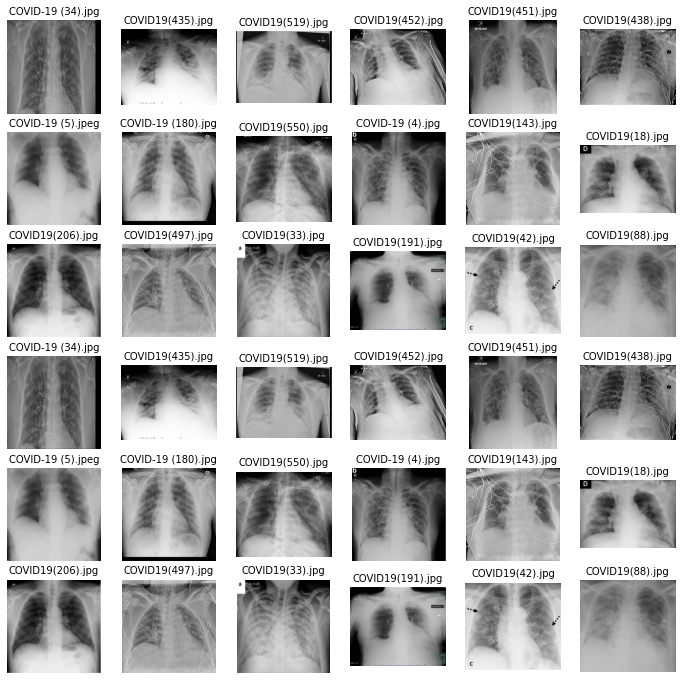

In [ ]:
# lets plot a grid of 36 images (18 images of COVID-19 and 18 images of Normal)

nrows = 6 # sets rows
ncols = 6 # sets columns

# set figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

# get filenmaes from the covid and normal directory of the train dataset
next_covid_pic = [os.path.join(train_covid_dir, fname) for fname in train_covid_names[0:18]]
next_normal_pic = [os.path.join(train_normal_dir, fname) for fname in train_normal_names[0:18]]

# print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_covid_pic):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(nrows,ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
  
plt.show()



Generating Training, Validation and Testing Batches

In [ ]:
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)

# Generator for our testing data
test_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for our validation data
valid_datagen = ImageDataGenerator(rescale = 1./255)

# methods to call

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

valid_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices
valid_generator.class_indices
test_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

Build CNN Model

In [ ]:
model = Sequential()

# add the convolutional layer
model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu',input_shape=(150, 150, 3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# dropout layer
model.add(Dropout(0.5))

# add another convolutional layer
model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# dropout layer
model.add(Dropout(0.5))

# flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer: amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer: 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 37, 37, 64)       

Compilation and Training Model

In [ ]:
# compile the model

model.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# train the model

history = model.fit(train_generator, epochs = 30, validation_data = valid_generator,
                              validation_steps = 10)

Epoch 1/30
46/46 [==============================] - 60s 1s/step - loss: 0.5968 - accuracy: 0.8199 - val_loss: 0.2941 - val_accuracy: 0.9312
Epoch 2/30
46/46 [==============================] - 48s 1s/step - loss: 0.2132 - accuracy: 0.9179 - val_loss: 0.1628 - val_accuracy: 0.9656
Epoch 3/30
46/46 [==============================] - 47s 1s/step - loss: 0.1705 - accuracy: 0.9400 - val_loss: 0.1583 - val_accuracy: 0.9594
Epoch 4/30
46/46 [==============================] - 47s 1s/step - loss: 0.1452 - accuracy: 0.9517 - val_loss: 0.2321 - val_accuracy: 0.9625
Epoch 5/30
46/46 [==============================] - 47s 1s/step - loss: 0.1375 - accuracy: 0.9524 - val_loss: 0.1559 - val_accuracy: 0.9625
Epoch 6/30
46/46 [==============================] - 47s 1s/step - loss: 0.1327 - accuracy: 0.9586 - val_loss: 0.1361 - val_accuracy: 0.9594
Epoch 7/30
46/46 [==============================] - 47s 1s/step - loss: 0.1332 - accuracy: 0.9503 - val_loss: 0.1291 - val_accuracy: 0.9688
Epoch 8/30
46/46 [==

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

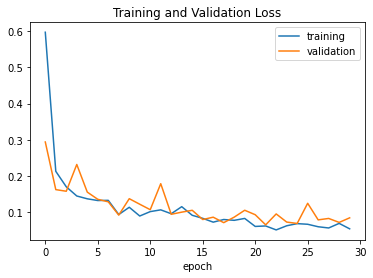

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

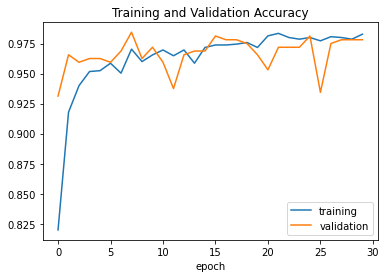

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

Testing Model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('test accuracy :{} test loss :{}'.format(test_accuracy,test_loss))

16/16 [==============================] - 10s 647ms/step - loss: 0.0772 - accuracy: 0.9731
test accuracy :0.9731404781341553 test loss :0.07720326632261276


In [ ]:
# test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.]

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid19')
  else:
    print('Normal')

In [ ]:
model.save("pneumonia_classification.h5")

In [ ]:
files.download('pneumonia_classification.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>